In [ ]:
## Imports ##

In [99]:
#basic data and image manipuation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#CNN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Flatten

#model management
import pickle


In [2]:
df_train = pd.read_csv("../data/mnist_train.csv")

In [3]:
df_test = pd.read_csv("../data/mnist_test.csv")

In [4]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## basic preprocessing ##

In [5]:
label = df_train['label']
df_train = df_train.drop('label', axis = 1)

In [7]:
df_test = df_test.drop('label', axis = 1)

In [8]:
df_train = df_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [13]:
df_train = df_train/255.0  
df_test = df_test/255.0

In [ ]:
## test train split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train, label, test_size= 0.3)

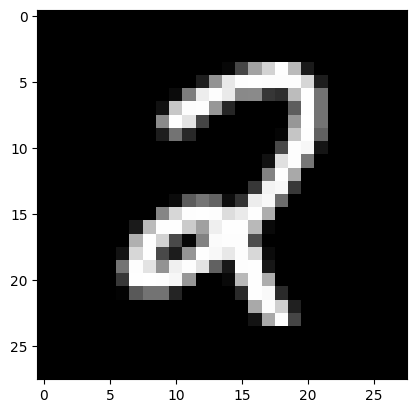

In [17]:
plt.imshow(X_train[100], cmap = "gray")

In [35]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28, 28, 1), padding='same', activation="relu")) # Flattening of a 28*28 image with 1 color
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))


model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 dense_15 (Dense)            (None, 28, 28, 100)       1700      
                                                                 
 dense_16 (Dense)            (None, 28, 28, 50)        5050      
                                                                 
 flatten (Flatten)           (None, 39200)             0         
                                                                 
 dense_17 (Dense)            (None, 20)                784020    
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
Total params: 791,140
Trainable params: 791,140
Non-tr

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          epochs=3,  # Use early stopping in practice
          batch_size=32, 
          verbose=1)

Epoch 1/3
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 2/3
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0417 - accuracy: 0.9864
Epoch 3/3
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0277 - accuracy: 0.9912


In [42]:
history.history

{'loss': [0.06787719577550888, 0.04165562987327576, 0.02765953168272972],
 'accuracy': [0.9793094992637634, 0.9864047765731812, 0.9911666512489319]}

In [45]:
model.predict(df_test)

313/313 [==============================] - 2s 5ms/step


array([[1.65090478e-12, 1.74494073e-08, 7.67373187e-09, ...,
        9.99990582e-01, 6.70401448e-07, 3.98940853e-10],
       [1.52169255e-09, 1.91853519e-06, 9.99989867e-01, ...,
        8.03333194e-17, 8.41229592e-13, 2.32115043e-12],
       [1.45018273e-08, 9.99962807e-01, 1.48423396e-05, ...,
        2.12920691e-06, 5.22650623e-07, 1.21528130e-08],
       ...,
       [1.70760074e-15, 1.05055326e-10, 2.95266097e-14, ...,
        8.83058515e-10, 8.94421746e-08, 1.87832666e-06],
       [6.65365707e-10, 1.46613235e-10, 1.40302049e-13, ...,
        2.22168123e-13, 7.88055422e-06, 6.46993353e-12],
       [1.24043598e-09, 4.53554763e-11, 5.98647221e-09, ...,
        1.77693430e-16, 5.01245490e-10, 5.46582224e-12]], dtype=float32)

In [46]:
predictions = model.predict(df_test)

313/313 [==============================] - 2s 5ms/step


In [47]:
predictions[0]

array([1.6509048e-12, 1.7449407e-08, 7.6737319e-09, 8.6532091e-06,
       7.2260340e-14, 1.3908663e-09, 1.6794646e-18, 9.9999058e-01,
       6.7040145e-07, 3.9894085e-10], dtype=float32)

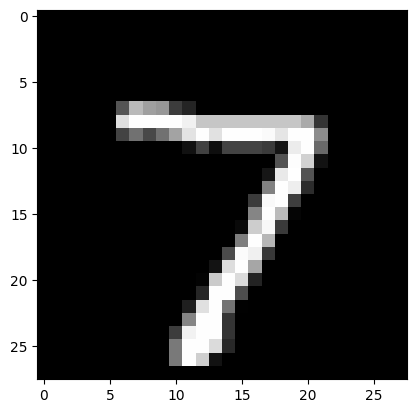

In [49]:
plt.imshow(df_test[0], cmap = "gray")

In [78]:
prediction = model.predict(np.expand_dims(df_test[20], axis=0))
prediction

1/1 [==============================] - 0s 21ms/step


array([[2.9241070e-08, 2.7608221e-06, 3.5858267e-09, 5.0893459e-06,
        4.3801940e-03, 2.4403398e-06, 3.5602349e-10, 2.2983365e-04,
        4.5457270e-04, 9.9492502e-01]], dtype=float32)

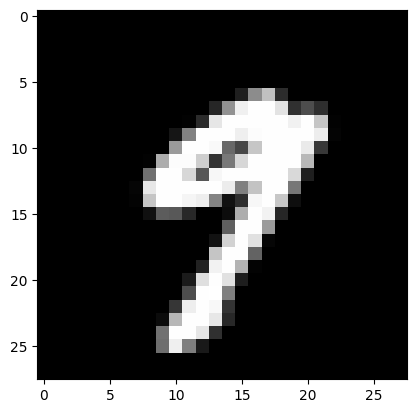

In [80]:
plt.imshow(df_test[20], cmap = "gray")

In [95]:
def predict_arr_to_int(array):
    digit = "unknown"
    for i in range(10):
        if array[0][i] > 0.9:
            digit = i
    return str(digit)

In [96]:
predict_arr_to_int(prediction)

'9'

In [97]:
prediction[0][9]

0.994925

In [100]:
filename = '../models/digit_model.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......flatten
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-23 18:39:07         2982
metadata.json            